<a href="https://colab.research.google.com/github/adilimam12/Regression-capstone-project2/blob/main/TED_Talk_Views_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) .**

---


TED Conferences, LLC is an American-Canadian non-profit media organization that posts international talks online for free distribution under the slogan "ideas worth spreading"

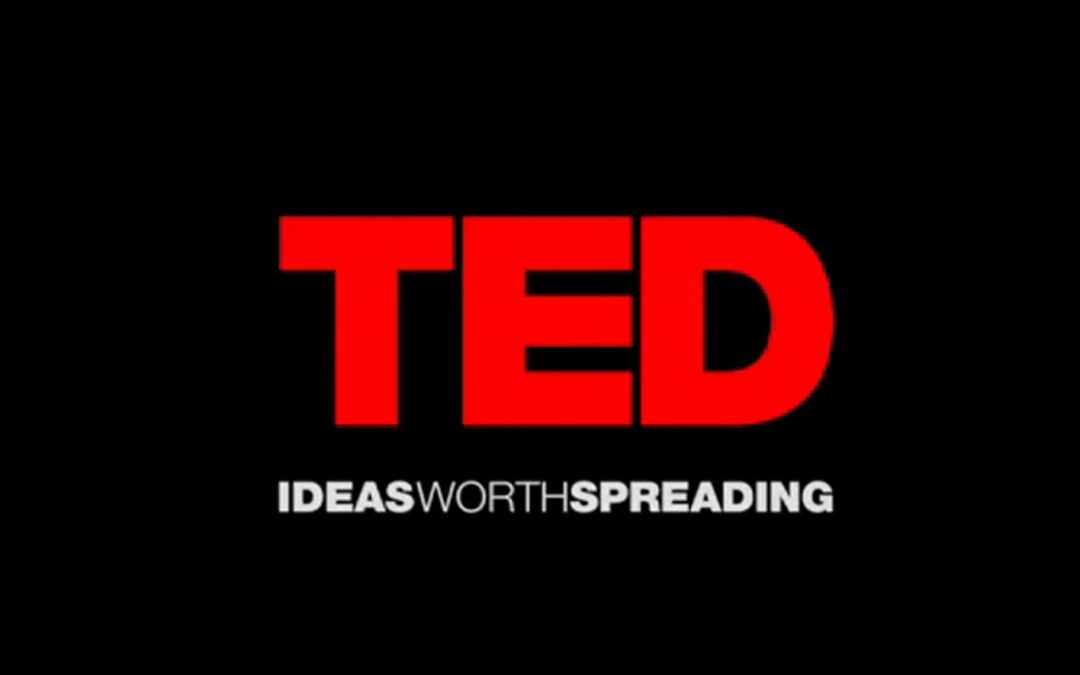

**Problem Statement**

---


TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

**Project Work flow**

---
Steps followed:

1)Data loading

2)Data Cleaning

3)EDA

4)Feature engineering

5)Model buliding

6)Evaluation of models


**Libraries used in this Project:**

---


Datawrangling:

Numpy

Pandas

For Graphing:

Matplotib

Seaborn

Machine learning:

Scikit-Learn

SK-Opt

XGBoost

CatBoost


In [6]:
#importing all necessary libraries
import numpy as np
import pandas as pd 
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
tedtalk_df=pd.read_csv('/content/drive/MyDrive/almabetter/capstone project2/data_ted_talks .csv')

# Some insights of the data

In [ ]:
tedtalk_df.head()

In [10]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

**Findings**:-

We can observe that we have 4005 rows of data with 19 columns. Before starting with the EDA, we need to clean the data.

# Data Cleaning

In [12]:
#checking which column is object or not
tedtalk_df.dtypes==object


talk_id           False
title              True
speaker_1          True
all_speakers       True
occupations        True
about_speakers     True
views             False
recorded_date      True
published_date     True
event              True
native_lang        True
available_lang     True
comments          False
duration          False
topics             True
related_talks      True
url                True
description        True
transcript         True
dtype: bool

In [16]:
#seperate numerical column and categorical column
num_vars=tedtalk_df.columns[tedtalk_df.dtypes !='object']
cat_vars=tedtalk_df.columns[tedtalk_df.dtypes =='object']
print(num_vars)
print(cat_vars)

Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')
Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')


In [18]:
tedtalk_df[num_vars]

,talk_id,views,comments,duration
0,1,3523392,272.0,977
1,92,14501685,628.0,1190
2,7,1920832,124.0,1286
3,53,2664069,219.0,1116
4,66,65051954,4931.0,1164
...,...,...,...,...
4000,62678,502934,6.0,690
4001,62782,307187,NaN,346
4002,62263,464414,9.0,774
4003,62784,56582,NaN,257
